In [2]:
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt
import seaborn as sns

In [3]:
url='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749'
data=pd.read_csv(url)


**BASIC OBSERVATION ABOUT DATA**

In [4]:
data.head()


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [5]:
data.shape

(180, 9)

In [6]:
data.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [7]:
data.index

RangeIndex(start=0, stop=180, step=1)

In [8]:
data.isna().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [10]:
data['Product']=data['Product'].astype('category')
data['Gender']=data['Gender'].astype('category')
data['MaritalStatus']=data['MaritalStatus'].astype('category')

#**ANALYSIS**


##**The % of each type of each tredmill sold.**

In [11]:
prod_count=data['Product'].value_counts()

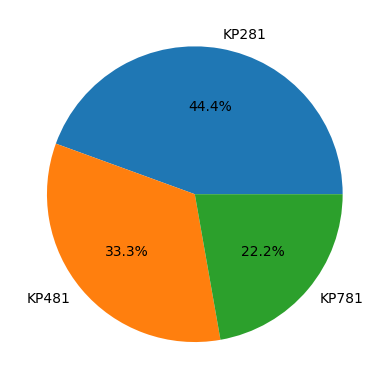

In [12]:
plt.pie(prod_count,labels=prod_count.index,autopct='%1.1f%%')
plt.show()

In [13]:
prob_281=80/180
prob_481=60/180
prob_781=40/180


* We see that tredmill KP281 has the biggest share,i.e. 44% among the three categories of the tredmills sold followed by KP481(33%) and KP681(22%)



**Checking the distribution of all the columns**

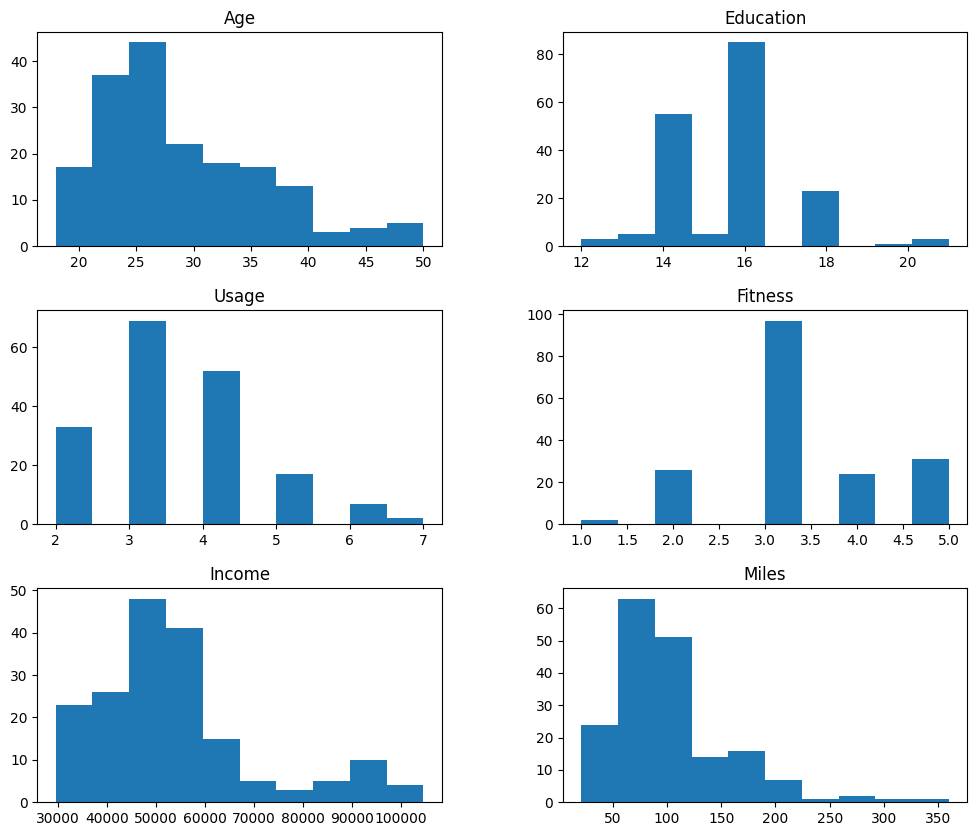

In [14]:
data.hist(figsize=(12,10),grid= False)
plt.show()

**Checking the dboxplot of the continous data to detect the outliers**

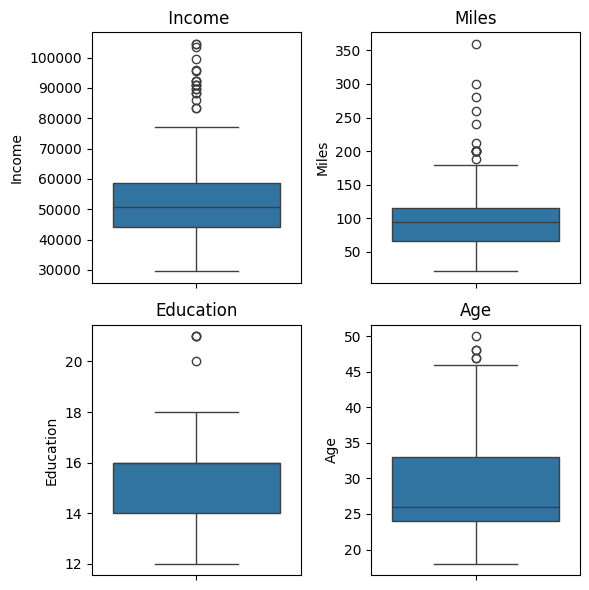

In [15]:
plt.subplots(2,2, figsize=(6,6))
plt.subplot(2,2,1)
plt.title(' Income')
sns.boxplot(data=data['Income'])

plt.subplot(2,2,2)
plt.title('Miles')
sns.boxplot(data =data['Miles'])


plt.subplot(2,2,3)
plt.title('Education')
sns.boxplot(data =data['Education'])

plt.subplot(2,2,4)
plt.title('Age')
sns.boxplot(data=data['Age'])


plt.tight_layout()
plt.show()

In [67]:
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


* 75% customer base age  24-33
* 75% customer education level 14-16
* 75% customer income $40k-$60k
* 75% customer intended miles run per week 66-120 miles per week

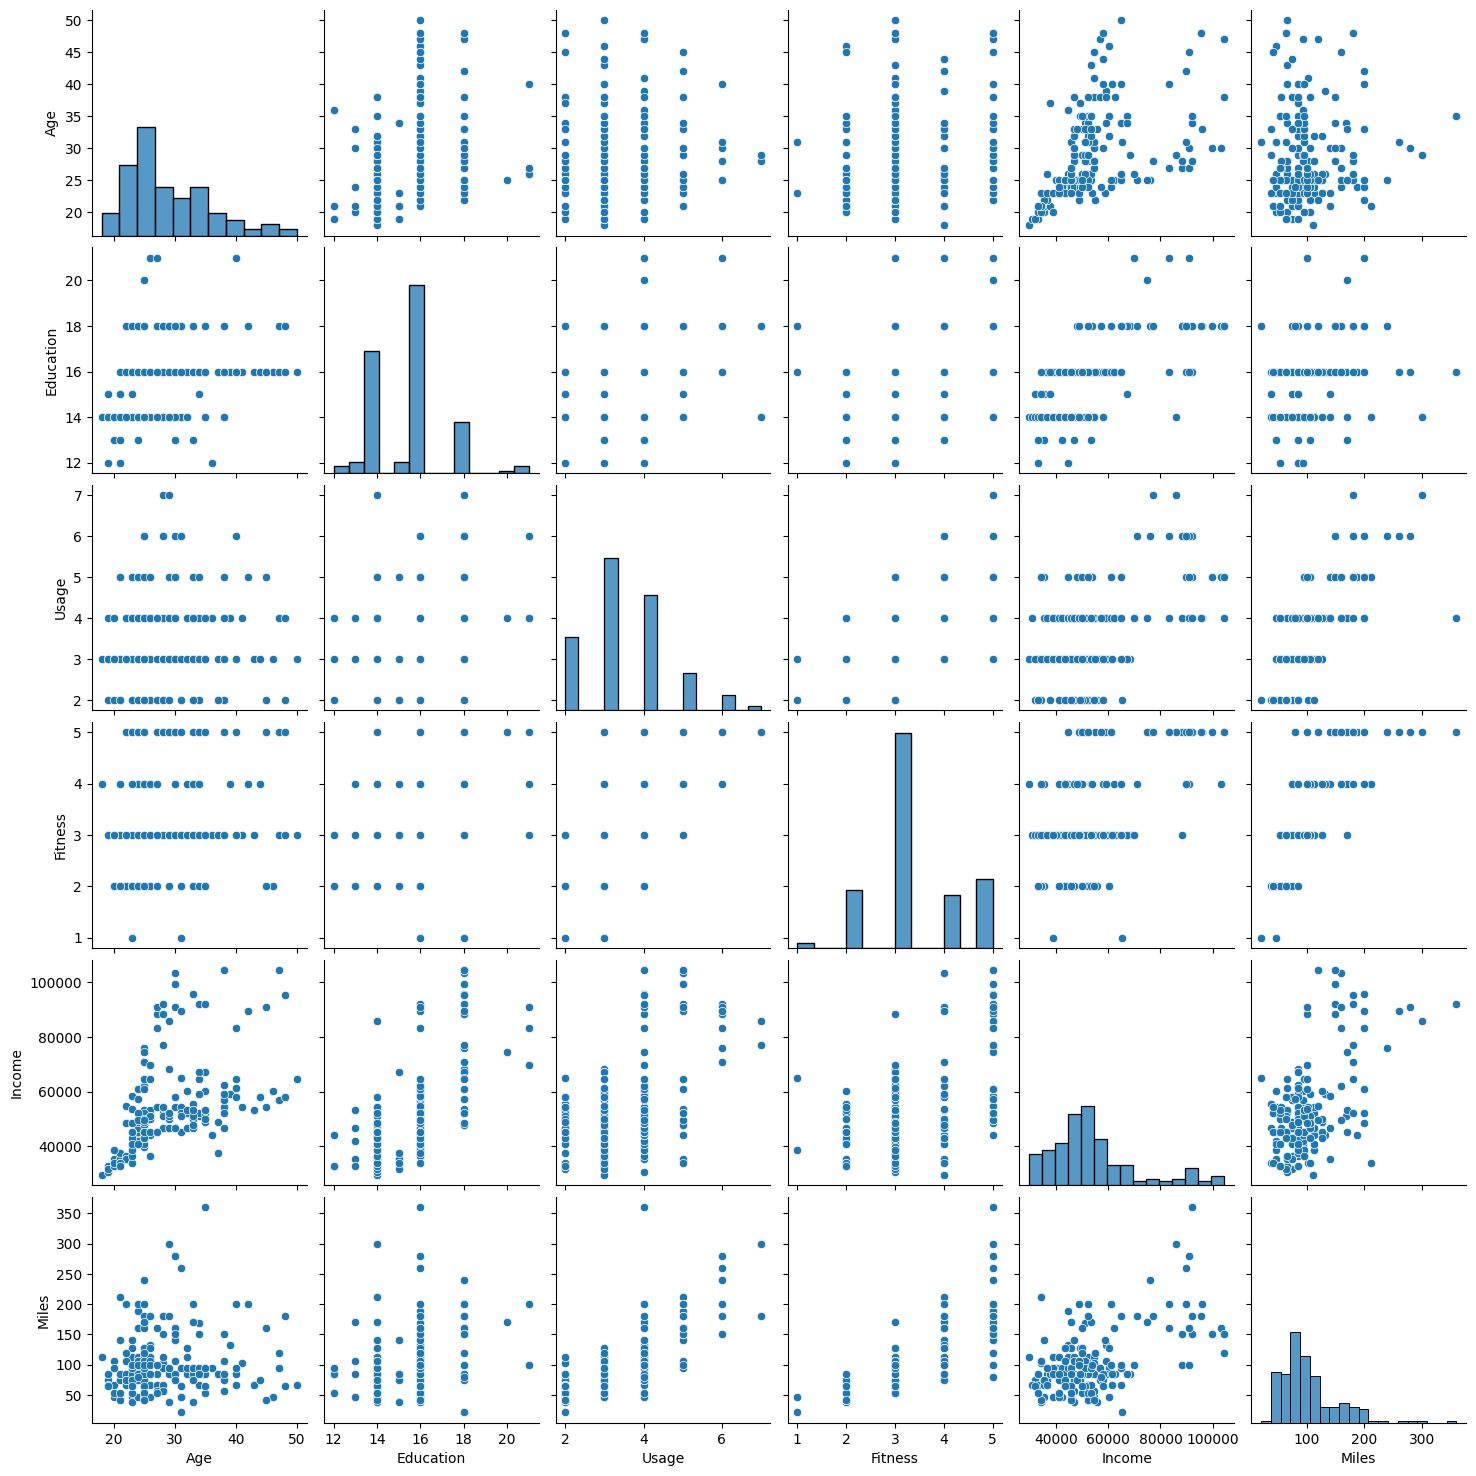

In [68]:
sns.pairplot(data)

## **Analysing on marital status**


In [16]:
data['MaritalStatus'].value_counts()

,count
MaritalStatus,
Partnered,107
Single,73


In [17]:
prob_single=73/180
prob_partnered=107/180

<Axes: xlabel='MaritalStatus', ylabel='count'>

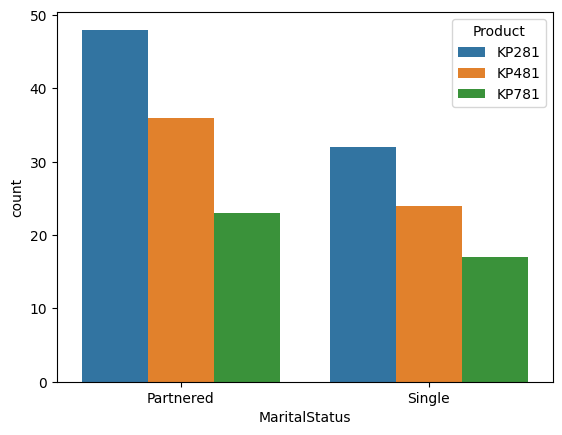

In [18]:
sns.countplot(x='MaritalStatus',hue='Product', data=data)

In [19]:
marital_corr=pd.crosstab(data['Product'],data['MaritalStatus'],normalize='columns')
marital_corr

MaritalStatus,Partnered,Single
Product,,
KP281,0.448598,0.438356
KP481,0.336449,0.328767
KP781,0.214953,0.232877


<Axes: xlabel='MaritalStatus', ylabel='Product'>

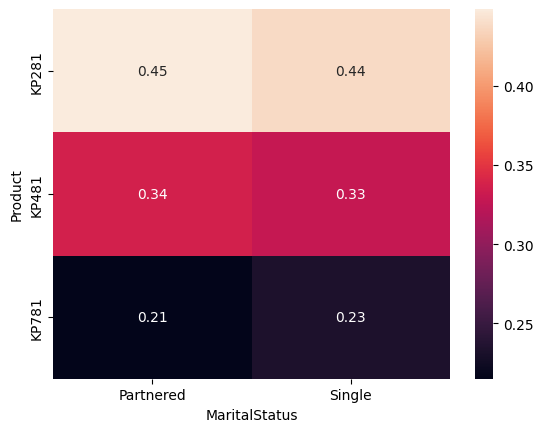

In [20]:
sns.heatmap(marital_corr,annot=True)



*   We observe that the sales of the products are equally distributed for partnered and single customers
*   So there isnt any dependency of the sale upon the marital status of the customer




##**Analysing sales on Gender**

In [21]:
data['Gender'].value_counts()

,count
Gender,
Male,104
Female,76


In [22]:
prob_male=104/180
prob_female=76/180

In [23]:
3.89/18.33

0.21222040370976544

<Axes: xlabel='Product', ylabel='count'>

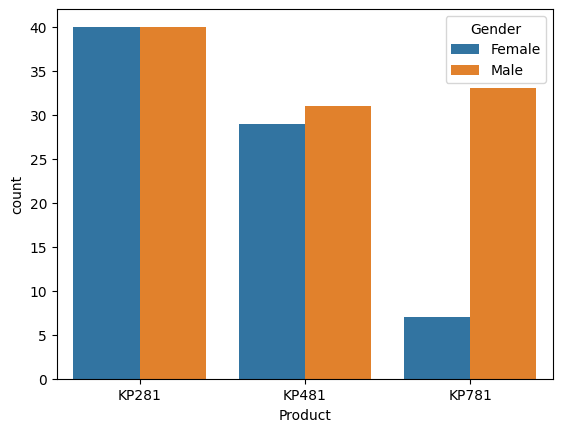

In [24]:
sns.countplot(x='Product',hue='Gender', data=data)

In [25]:
gender_corr=pd.crosstab(data['Product'],data['Gender'],normalize='columns')*100
gender_corr

Gender,Female,Male
Product,,
KP281,52.631579,38.461538
KP481,38.157895,29.807692
KP781,9.210526,31.730769


In [26]:
gender_given_product =pd.crosstab(data['Product'],data['Gender'],normalize='index')*100
gender_given_product

Gender,Female,Male
Product,,
KP281,50.000000,50.000000
KP481,48.333333,51.666667
KP781,17.500000,82.500000


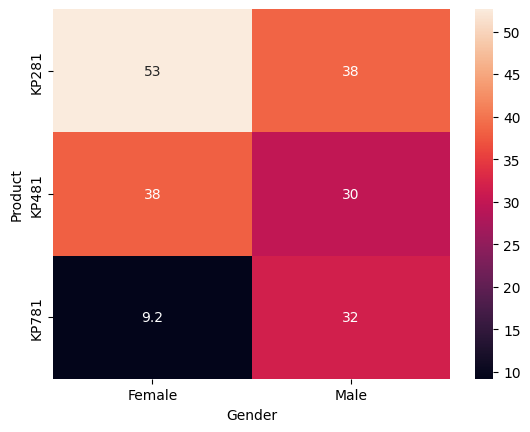

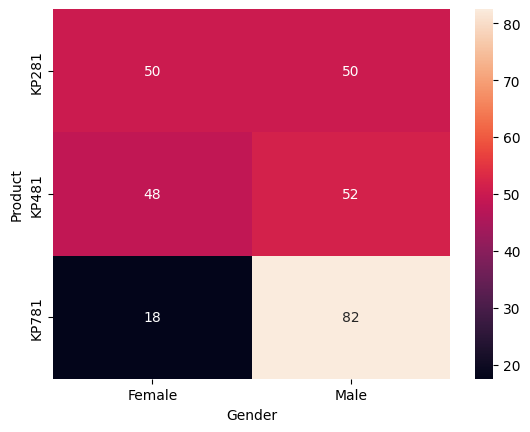

In [27]:
sns.heatmap(gender_corr,annot=True)
plt.show()
sns.heatmap(gender_given_product,annot=True)
plt.show()

* We observe that males and females contribute almost equal sales of KP281 and KP481 but the female contribution to KP781 sales droops to just 21%.
* Females incline towards buying KP281 (53%), 38 % buy KP481 but only 9% buy our premium tredmill
* for males, we observe equal distribution along all the products


##**Analysing sales on fitness levels**

In [28]:
data['Fitness'].value_counts()

,count
Fitness,
3,97
5,31
2,26
4,24
1,2


In [29]:
16.11/17.22

0.9355400696864111

<Axes: xlabel='Fitness', ylabel='Count'>

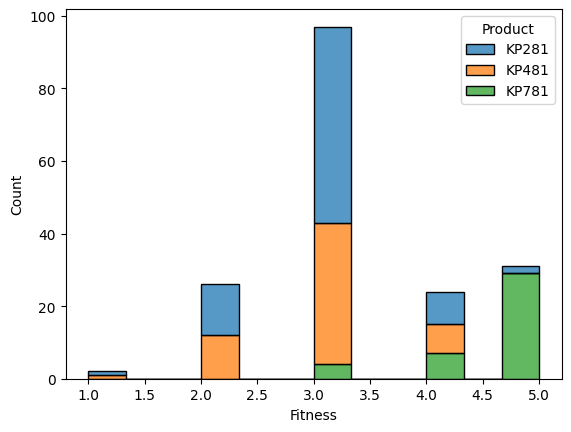

In [30]:
sns.histplot(data=data,x='Fitness',hue='Product',multiple='stack')

In [31]:
Fitness_corr=pd.crosstab(data['Fitness'],data['Product'],normalize='index')*100
Fitness_corr


Product,KP281,KP481,KP781
Fitness,,,
1,50.000000,50.000000,0.000000
2,53.846154,46.153846,0.000000
3,55.670103,40.206186,4.123711
4,37.500000,33.333333,29.166667
5,6.451613,0.000000,93.548387


In [32]:
fitness_given_product=pd.crosstab(data['Fitness'],data['Product'],normalize='columns')*100
fitness_given_product

Product,KP281,KP481,KP781
Fitness,,,
1,1.25,1.666667,0.0
2,17.50,20.000000,0.0
3,67.50,65.000000,10.0
4,11.25,13.333333,17.5
5,2.50,0.000000,72.5


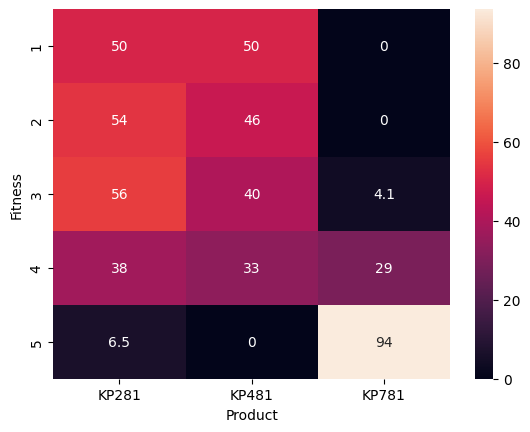

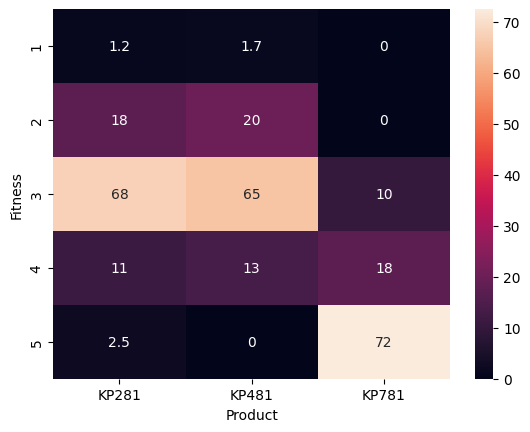

In [65]:
sns.heatmap(Fitness_corr, annot=True)
plt.show()
sns.heatmap(fitness_given_product, annot=True)
plt.show()

* We observe that modertely fit people(fitness 3) give us the most sales, which concentrate at KP281 and KP481.
*Second larget contributer becomes most fit customers(fitness 5) who buy 93% KP781 and 7% KP281
*Our premium tredmill ony see sales from 3+ fitness levels
*KP281 emerges as a hero product getting to all fitness users

##**Analysing sales on Education**

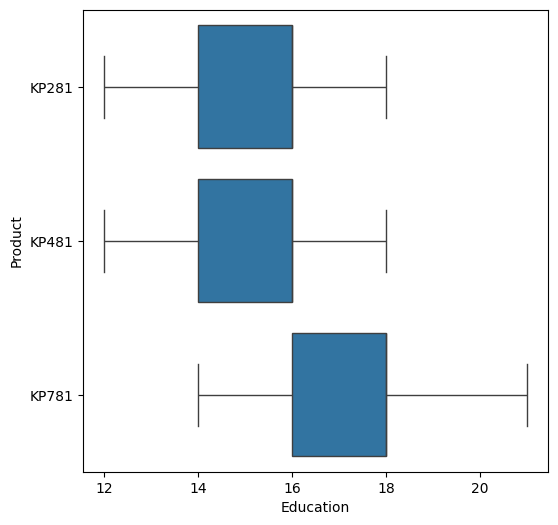

In [34]:
plt.figure(figsize=(6,6))
sns.boxplot(data=data, x='Education',y='Product')
plt.show()

In [35]:
data['Education'].describe()

,Education
count,180.000000
mean,15.572222
std,1.617055
min,12.000000
25%,14.000000
50%,16.000000
75%,16.000000
max,21.000000


<Axes: xlabel='Education', ylabel='Count'>

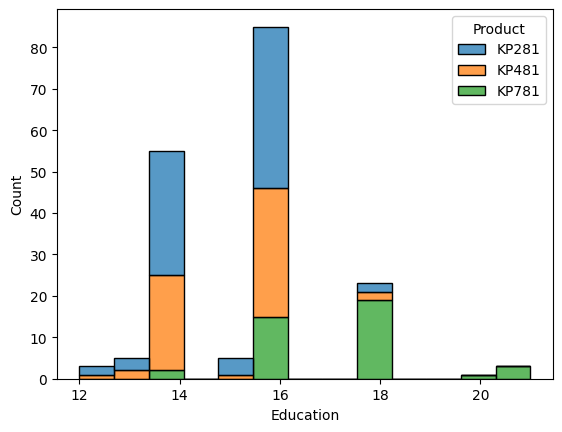

In [36]:
sns.histplot(data=data,x='Education',hue='Product',multiple='stack')

In [37]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [38]:
Education_given_product=pd.crosstab(data['Product'],data['Education'],normalize='index')*100
Education_given_product

Education,12,13,14,15,16,18,20,21
Product,,,,,,,,
KP281,2.500000,3.750000,37.500000,5.000000,48.750000,2.500000,0.0,0.0
KP481,1.666667,3.333333,38.333333,1.666667,51.666667,3.333333,0.0,0.0
KP781,0.000000,0.000000,5.000000,0.000000,37.500000,47.500000,2.5,7.5


In [39]:
Product_given_education=pd.crosstab(data['Product'],data['Education'],normalize='columns')*100
Product_given_education

Education,12,13,14,15,16,18,20,21
Product,,,,,,,,
KP281,66.666667,60.0,54.545455,80.0,45.882353,8.695652,0.0,0.0
KP481,33.333333,40.0,41.818182,20.0,36.470588,8.695652,0.0,0.0
KP781,0.000000,0.0,3.636364,0.0,17.647059,82.608696,100.0,100.0


* We dont get much sales across the three categories for 12-13 educated customers
*for KP281,KP481 14-16 educated customers bring in good revenue
* with increaing education, we observe that customer moves towards buying more expensive tredmil
*KP481 14-18 educated people bring in good sales
* while KP781 sales increase for 16-18 educated people.


##**Analysing sales on Age**


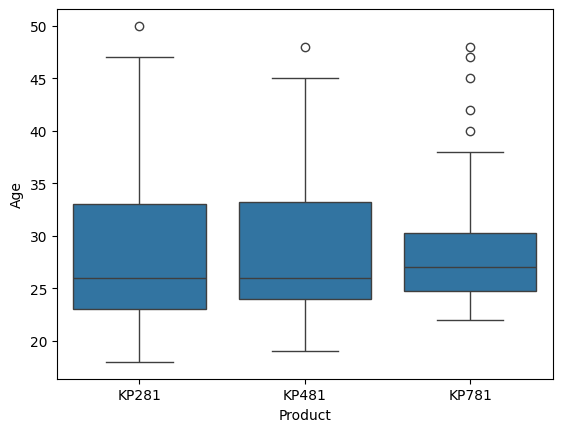

In [40]:
sns.boxplot(x='Product',y='Age', data=data)
plt.show()

In [41]:
label=['below 20','20-30','30-40','40+']
data['age_group']=pd.cut(data['Age'], bins=[0,19,29,39,51],labels=label)


<Axes: xlabel='age_group', ylabel='Count'>

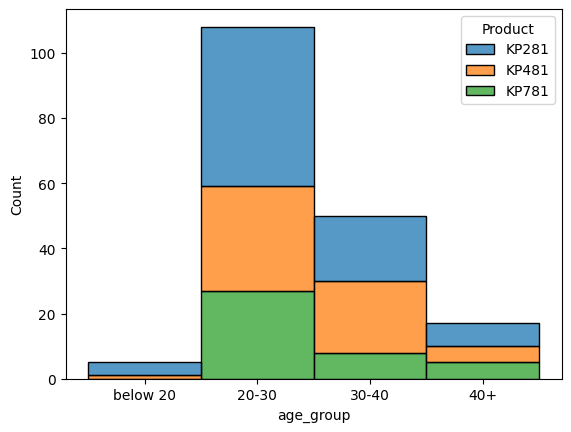

In [42]:
sns.histplot(data=data,x='age_group',hue='Product',multiple='stack')

In [43]:
age_corr=pd.crosstab(data['Product'],data['age_group'],normalize='columns')*100
age_corr

age_group,below 20,20-30,30-40,40+
Product,,,,
KP281,80.0,45.37037,40.0,41.176471
KP481,20.0,29.62963,44.0,29.411765
KP781,0.0,25.00000,16.0,29.411765


In [44]:
age_givenProduct=pd.crosstab(data['Product'],data['age_group'],normalize='index')*100
age_givenProduct

age_group,below 20,20-30,30-40,40+
Product,,,,
KP281,5.000000,61.250000,25.000000,8.750000
KP481,1.666667,53.333333,36.666667,8.333333
KP781,0.000000,67.500000,20.000000,12.500000


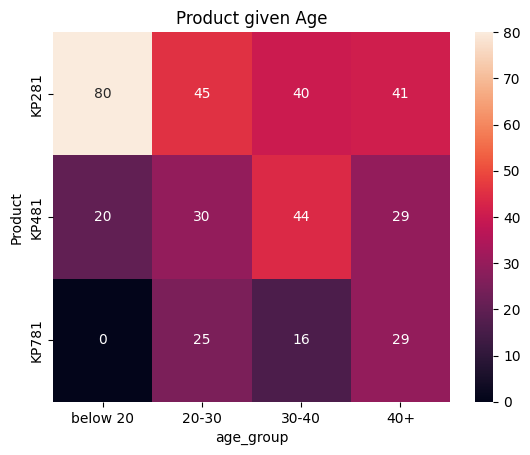

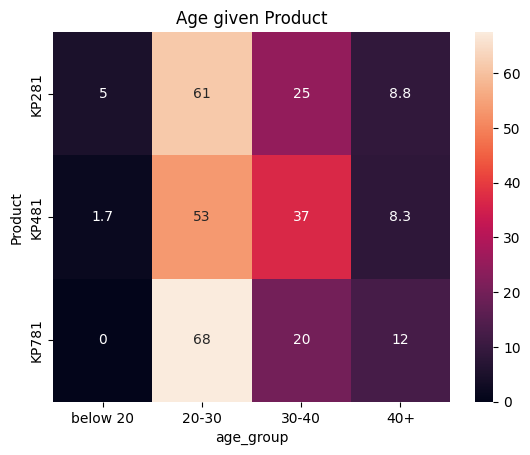

In [45]:


plt.title('Product given Age')
sns.heatmap(age_corr, annot=True)
plt.show()
plt.title('Age given Product')
sns.heatmap(age_givenProduct, annot=True)
plt.show()

* We observe that our sales concentrate from 20-40 aged customers.
* 20-30 age group is a brings in the most no of customers
* All customer age groups fav product is KP281 followed by KP481

##**Analying sales on Income**


<Axes: xlabel='Product', ylabel='Income'>

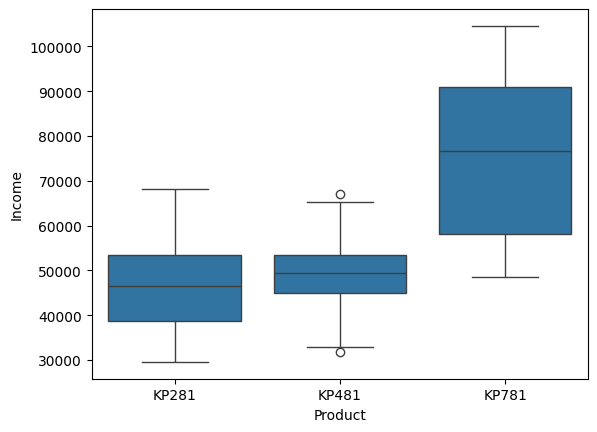

In [46]:
sns.boxplot(data=data,x=data['Product'],y=data['Income'])

In [47]:
data['Income'].agg(['min','max'])

,Income
min,29562
max,104581


In [48]:
labels=['20k-40K','40k-60k','60k-80k','80k-100k']
data['income_group']=pd.cut(data['Income'],bins:=[20000,40000,60000,80000,100000],labels=labels)

<Axes: xlabel='income_group', ylabel='Count'>

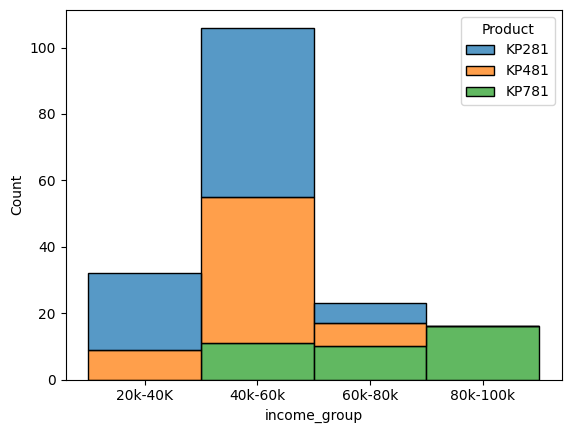

In [49]:
sns.histplot(data=data,x='income_group',hue='Product',multiple='stack')

In [50]:
income_corr=pd.crosstab(data['Product'],data['income_group'],normalize='columns')*100
income_corr

income_group,20k-40K,40k-60k,60k-80k,80k-100k
Product,,,,
KP281,71.875,48.113208,26.086957,0.0
KP481,28.125,41.509434,30.434783,0.0
KP781,0.000,10.377358,43.478261,100.0


In [51]:
income_given_prod =pd.crosstab(data['Product'],data['income_group'],normalize='index')*100
income_given_prod

income_group,20k-40K,40k-60k,60k-80k,80k-100k
Product,,,,
KP281,28.75,63.750000,7.500000,0.000000
KP481,15.00,73.333333,11.666667,0.000000
KP781,0.00,29.729730,27.027027,43.243243


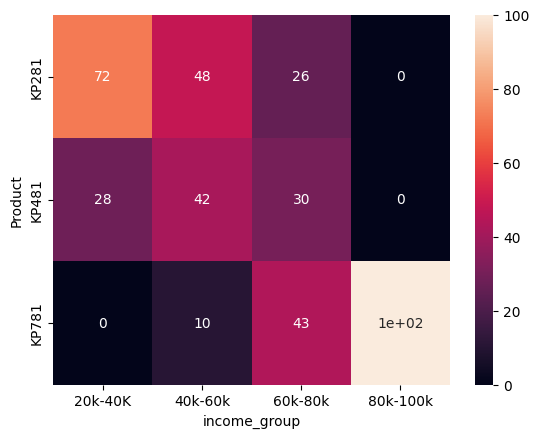

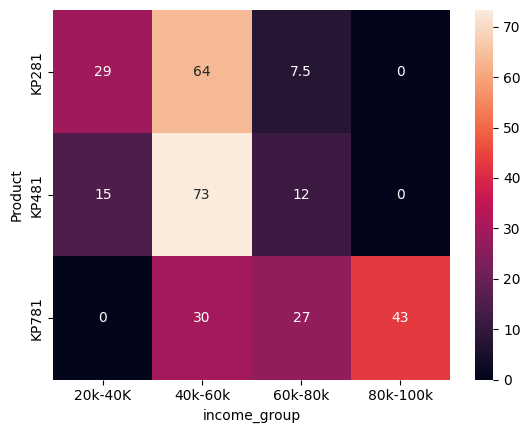

In [52]:
sns.heatmap(income_corr, annot=True)
plt.show()
sns.heatmap(income_given_prod, annot=True)
plt.show()

* We receive most sales from customers within the income range of 40-60k
* Low income(20k-40k) prefer KP281, (40k-60k) prefer KP481 while above 60k income customers prefer KP781


##**Analysing sales on the basis of intended miles run per week by the user**

<Axes: xlabel='Miles', ylabel='Count'>

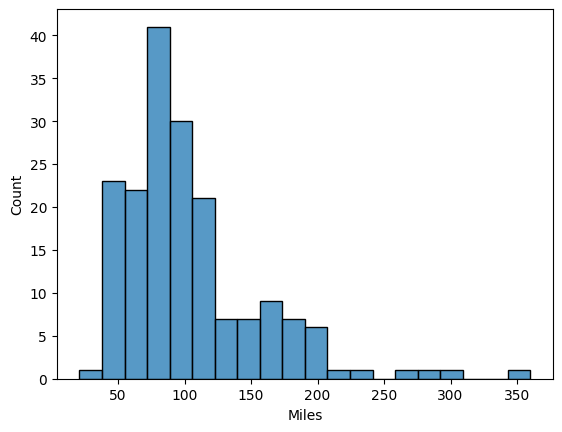

In [53]:
sns.histplot(data=data,x='Miles',multiple='stack')

In [54]:
data['Miles'].describe()

,Miles
count,180.000000
mean,103.194444
std,51.863605
min,21.000000
25%,66.000000
50%,94.000000
75%,114.750000
max,360.000000


In [55]:
labels=['0-50','50-100','100-150','150-200','200-250','250-300','300-350','350-400']

In [56]:
data['Miles_group']=pd.cut(data['Miles'],bins=[0,50,100,150,200,250,300,350,400],labels=labels)

In [57]:
miles_corr=pd.crosstab(data['Product'],data['Miles_group'],normalize='columns')*100
miles_corr

Miles_group,0-50,50-100,100-150,150-200,200-250,250-300,350-400
Product,,,,,,,
KP281,70.588235,51.546392,42.105263,9.090909,0.0,0.0,0.0
KP481,29.411765,40.206186,34.210526,9.090909,50.0,0.0,0.0
KP781,0.000000,8.247423,23.684211,81.818182,50.0,100.0,100.0


<Axes: xlabel='Miles_group', ylabel='Product'>

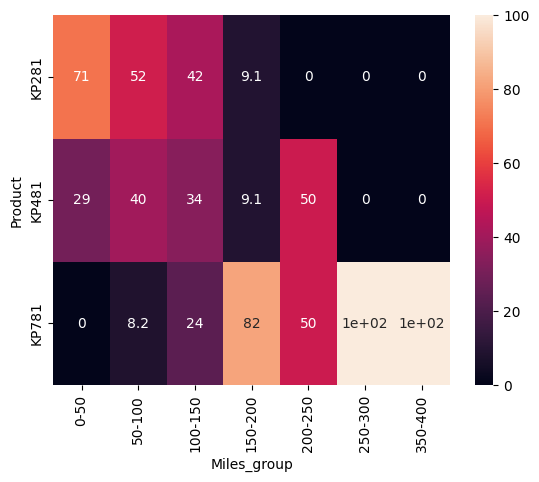

In [58]:
sns.heatmap(miles_corr,annot=True)

* customers targting more htan average miles per week prefer KP781
* customers who run/walk less miles choose KP281
* with increaseing miles, customers shift from KP281 to KP481 to KP781


##**Analysing sales on the intended usage days per week by the user**

<Axes: xlabel='Usage', ylabel='Count'>

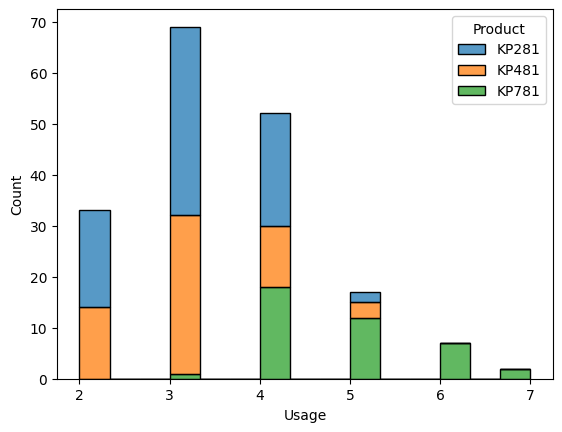

In [59]:
sns.histplot(data=data,x='Usage',hue='Product',multiple='stack')

In [60]:
weekly_usage=pd.crosstab(data['Product'], data['Usage'],normalize='columns')
weekly_usage

Usage,2,3,4,5,6,7
Product,,,,,,
KP281,0.575758,0.536232,0.423077,0.117647,0.0,0.0
KP481,0.424242,0.449275,0.230769,0.176471,0.0,0.0
KP781,0.000000,0.014493,0.346154,0.705882,1.0,1.0


<Axes: xlabel='Usage', ylabel='Product'>

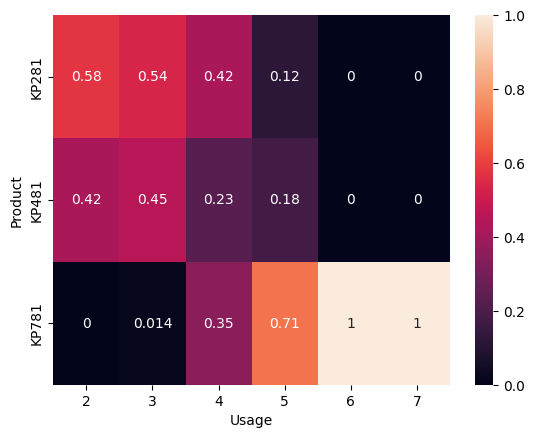

In [61]:
sns.heatmap(weekly_usage,annot=True)

* Customers who use tredmills for 5+ days choose KP781
* Customers using tredmill for 2,3 days go for KP281

## **Interrelation**

<Axes: xlabel='Product', ylabel='Age'>

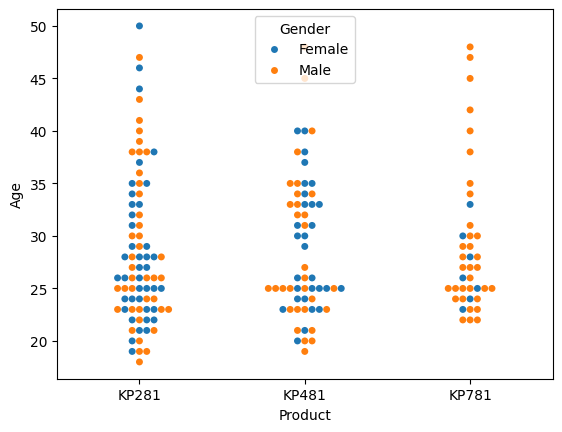

In [62]:
sns.swarmplot(data=data,x='Product',y='Age',hue='Gender')

* We observe in our older customer base, males buy KP781 more than females

<Axes: xlabel='Product', ylabel='Income'>

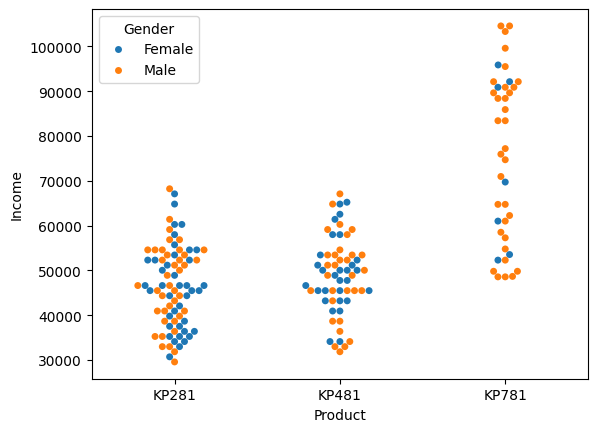

In [63]:
sns.swarmplot(data=data,x='Product',y='Income',hue='Gender')

* Only High income customers go for our premium tredmill irrespective of their gender

## **Customer Profiling**

**KP281**(entry level $1500)

* **Age Preference**  : young customer base in their mid 20s and 30s
* **Gender Prefrence** : Of the existing customers gender share is equal for KP281. But our 53% of female customers,buy KP281.
* **Education** : 14-16 education level
* **Usage** : moderate usage, fitness conscious customers 2-4 days usage
* **Fitness** : people with fitness levels upto 3 (about 80%)go for KP281
* **Income** : low income people prefer KP281
* **Miles per week** :  people who intend to run/walk upto 50 - 100 miles



**KP481**(mid level $1750)

*   **Age Preference** : 20-30 and 30-40 age group contribute to 90% of the sale of the product
* **Gender Prefrence** : not much dependence on gender
* **Education** : people with education level of 14-16
* **Usage** :  customers who use tredmills for 3-4 days
* **Fitness** : fitness conscious people having good fitness of 3 lay their eyes on KP481
* **Income** : a fair share comes from people earning 40-60k
* **Miles**: again people who intend to run/walk upto 150 miles


**KP781**(premium $2500)

* **Age Preference** : 20-40 contribute to 88% of the sale. 40+ age group customers prefer KP781 over other products
* **Gender Prefrence**: mostly males (80%) contribute to the sale
* **Education** : highly educated people (14-16 level) go for KP781
* **Usage** : more than average usage (4+ days per week)
* **Fitness**: 3-4-5 level fitness, very fit people choose KP781
* **Income**: high income customers buy KP781
* **Miles** : peoplewho target more than 150miles per week go for our premium product



**Recommendations**
* Targeted Marketing:

KP281: Focus on cost-conscious customers and those new to fitness. Highlight affordability and basic features.

KP481: Target mid-range customers who want a balance between price and features. Emphasize value for money.

KP781: Aim at high-income individuals and fitness enthusiasts. Highlight advanced features, durability, and premium quality.

* Enhance Product Features:

Based on customer feedback and usage patterns, consider adding new features to KP281 to make it more appealing without significantly increasing the price.

* Loyalty Programs:

Implement loyalty programs to retain customers. Offer rewards or discounts for repeat purchases or referrals.

* Expand Distribution Channels:

Increase the availability of KP781 in high-end fitness stores and online platforms to reach a broader audience.

* Customer Support and Training:

Provide excellent customer support and training sessions for new users, especially for KP781, to ensure customer satisfaction and reduce return rates.

* Feedback Mechanism:

Establish a robust feedback mechanism to gather customer opinions and improve products continuously.

* Partnerships:

Partner with gyms, fitness centers, and health clubs to promote Aerofit treadmills. Offer corporate discounts or bulk purchase deals.

* Sustainability Initiatives:

Highlight any eco-friendly aspects of the treadmills, such as energy efficiency or sustainable materials, to attract environmentally conscious consumers.